In [580]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score


In [581]:
bike_2011 = pd.read_csv('/Users/esrasaydam/Documents/Springboard/GitHub/Capstone Project #2/Bike_2011.csv')

In [582]:
bike_2011.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [583]:
bike_2011.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [584]:
# let's make some numbers categorical...
bike_2011['season'] = bike_data.season.astype('category')
bike_2011['mnth'] = bike_data.mnth.astype('category')
bike_2011['holiday'] = bike_data.holiday.astype('category')
bike_2011['weekday'] = bike_data.weekday.astype('category')
bike_2011['workingday'] = bike_data.workingday.astype('category')
bike_2011['weathersit'] = bike_data.weathersit.astype('category')


In [585]:
#Create dummy or indicator features for categorical variables
df = bike_2011.copy()

df = pd.get_dummies(df,
                     columns = ['season', 'weathersit', 'season', 'yr', 'mnth', 'holiday', 'weekday'])
display(df)


,instant,dteday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,0,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,1,0,0,0,0,0,0,0,1
1,2,2011-01-02,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,1,0,1,0,0,0,0,0,0
2,3,2011-01-03,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,1,0,0,1,0,0,0,0,0
3,4,2011-01-04,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,1,0,0,0,1,0,0,0,0
4,5,2011-01-05,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,1,0.325000,0.327633,0.762500,0.188450,103,1059,1162,...,1,1,0,0,0,1,0,0,0,0
361,362,2011-12-28,1,0.299130,0.279974,0.503913,0.293961,255,2047,2302,...,1,1,0,0,0,0,1,0,0,0
362,363,2011-12-29,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423,...,1,1,0,0,0,0,0,1,0,0
363,364,2011-12-30,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999,...,1,1,0,0,0,0,0,0,1,0


In [586]:
#let's make sure of the feature types.
df.dtypes

instant            int64
dteday            object
workingday      category
temp             float64
atemp            float64
hum              float64
windspeed        float64
casual             int64
registered         int64
cnt                int64
season_1           uint8
season_2           uint8
season_3           uint8
season_4           uint8
weathersit_1       uint8
weathersit_2       uint8
weathersit_3       uint8
season_1           uint8
season_2           uint8
season_3           uint8
season_4           uint8
yr_0               uint8
mnth_1             uint8
mnth_2             uint8
mnth_3             uint8
mnth_4             uint8
mnth_5             uint8
mnth_6             uint8
mnth_7             uint8
mnth_8             uint8
mnth_9             uint8
mnth_10            uint8
mnth_11            uint8
mnth_12            uint8
holiday_0          uint8
holiday_1          uint8
weekday_0          uint8
weekday_1          uint8
weekday_2          uint8
weekday_3          uint8


In [587]:
df.head()

,instant,dteday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,0,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,1,0,0,0,0,0,0,0,1
1,2,2011-01-02,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,1,0,1,0,0,0,0,0,0
2,3,2011-01-03,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,1,0,0,1,0,0,0,0,0
3,4,2011-01-04,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,1,0,0,0,1,0,0,0,0
4,5,2011-01-05,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,1,0,0,0,0,1,0,0,0


In [588]:
# Standardize the magnitude of numeric features using a scaler
#drop the 'dteday' column which is an object and also 'registered', 'casual' and 'atemp' to simplify the numbers
#and year cloumn since it is redundant to have it for now. We cut off workingday since overall it doesn't make a big
#difference we have already weekend and weekday columns..
df.drop(columns = ['dteday', 'atemp', 'casual', 'registered', 'instant', 'workingday'], inplace = True)
df.head()


,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344167,0.805833,0.160446,985,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0.363478,0.696087,0.248539,801,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [589]:
# Making a Scaler object
scaler = StandardScaler()
# Fitting data to the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns= df.columns)
scaled_df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [590]:
#Split into testing and training datasets 
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop(columns = 'cnt'),scaled_df.cnt, 
                                                 test_size=0.2, 
                                                    random_state=47)



In [591]:
# in case I want to scale after train_test splitting.
#sc = StandardScaler()
#X_train_std = sc.fit_transform(X_train)
#X_test_std = sc.transform(X_test)

MODELING for Philadelphia branch of Capital Branch

In [592]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score


Models to try
1 - Linear Regression model
2 - Elastic Net
3 - Random Forest Regression
4 - Gradient Boosting
5 - Decision Tree
6- Extra Tree Regressor
7 - Bagging Regressor
8- Ada Boost Regressor
9- Huber Regressor

In [593]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn import model_selection
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
from scipy.stats import loguniform



In [594]:


models = [LinearRegression(),
          AdaBoostRegressor(),
          Ridge(),
          HuberRegressor(),
          GradientBoostingRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]


# A function is wrtten to find out the cross validation score based on mean absolute error

def compare_models(model):
    #also counting running time
    start_time = dt.now()
    kfold = model_selection.KFold(n_splits=10)
    mean_dev_scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    Scores= pd.DataFrame({'Mean deviation of {} is {}'.format(model, np.mean(mean_dev_scores)),'R Square{}'.format(np.mean(r2_scores))})
    print(Scores)
    end_time = dt.now()
    print('Running time: {}'.format(end_time - start_time))

for model in models:
    compare_models(model)

                                                   0
0                         R Square0.7743781144202695
1  Mean deviation of LinearRegression() is -0.329...
Running time: 0:00:00.047048
                                                   0
0  Mean deviation of AdaBoostRegressor() is -0.37...
1                         R Square0.7538335778719202
Running time: 0:00:00.817737
                                                  0
0                        R Square0.7741423398224088
1  Mean deviation of Ridge() is -0.3317606326120556
Running time: 0:00:00.035242
                                                   0
0                         R Square0.7799407172963112
1  Mean deviation of HuberRegressor() is -0.32550...
Running time: 0:00:00.137288
                                                   0
0  Mean deviation of GradientBoostingRegressor() ...
1                          R Square0.819485520464581
Running time: 0:00:00.706496
                                                   0
0  Mean de

###### GradientBoostingRegressor() is the model with the highest R score.
The second best would be RandomForestRegressor. I'll try both of them.

In [595]:
start_time = dt.now()
random = RandomForestRegressor()
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
score1 = random.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score1))

Running time: 0:00:00.140956 and Score 0.8564622455307392


In [596]:
print(cross_val_score(random, X_test,np.ravel(y_test),cv=10))
print('Mean of CVs:',np.mean(cross_val_score(random, X_test,np.ravel(y_test),cv=10)))

[ 0.91006552  0.66649867  0.88858336  0.63431398  0.8232597   0.80594235
  0.68758179 -0.67013034  0.76845456  0.94595918]
Mean of CVs: 0.6677657688460161


In [597]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters for RandomForestRegresser


param_grid ={'n_estimators': [5, 20, 50, 100], 
             'max_features': ['auto', 'sqrt'], 
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 
             'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 
             'bootstrap': [True, False]} 

random_tree = RandomForestRegressor()
dt_rs = RandomizedSearchCV(random_tree, param_grid, cv=10)
dt_rs.fit(X_train, y_train)
dt_rs.best_params_


{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [598]:

# Create an instance of RandomForestRegressor
start_time = dt.now()
random = RandomForestRegressor(n_estimators = 5, min_samples_leaf = 1, max_features= 'sqrt',
                               max_depth= 70, min_samples_split = 6, bootstrap= False )
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
score1 = random.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score1))

Running time: 0:00:00.007515 and Score 0.7981863553574294


Now let's try Gardient Boosting Regressor since the result doesn't look good.

In [599]:
start_time = dt.now()

gradient = GradientBoostingRegressor()
gradient.fit(X_train,y_train)
y_pred = gradient.predict(X_test)
score5= gradient.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score5 ))

Running time: 0:00:00.040875 and Score 0.8737917304821311


In [600]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[50, 100, 500,1000],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],'subsample':[.5,.75,1],
             'random_state':[1]}
search=GridSearchCV(estimator=GBR,
                    param_grid=search_grid,
                    scoring='neg_mean_squared_error',
                    n_jobs=1, cv=5)
search.fit(X_train, y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.5}

This took ages to find. But I'll use it.

In [601]:
start_time = dt.now()

gradient = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 4,
                                     n_estimators= 1000,random_state= 1,subsample= 0.5)
gradient.fit(X_train,y_train)
y_pred = gradient.predict(X_test)
scorehp= gradient.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, scorehp ))

Running time: 0:00:00.342933 and Score 0.8788440806064434


The score is not improving so much, so I decided to bring back bike_data_2012. Let's redo everything with both years.

In [602]:
bike_data = pd.read_csv('/Users/esrasaydam/Documents/Springboard/GitHub/Capstone Project #2/Bike_data1.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [603]:
# let's make some numbers categorical...
bike_data['season'] = bike_data.season.astype('category')
bike_data['mnth'] = bike_data.mnth.astype('category')
bike_data['holiday'] = bike_data.holiday.astype('category')
bike_data['weekday'] = bike_data.weekday.astype('category')
bike_data['workingday'] = bike_data.workingday.astype('category')
bike_data['weathersit'] = bike_data.weathersit.astype('category')


In [604]:
df1 = bike_data.copy()

df1 = pd.get_dummies(df1,
                     columns = ['season', 'weathersit', 'season', 'yr', 'mnth', 'holiday', 'weekday'])
display(df1)


,instant,dteday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,0,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,1,0,0,0,0,0,0,0,1
1,2,2011-01-02,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,1,0,1,0,0,0,0,0,0
2,3,2011-01-03,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,1,0,0,1,0,0,0,0,0
3,4,2011-01-04,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,1,0,0,0,1,0,0,0,0
4,5,2011-01-05,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,727,2012-12-27,1,0.254167,0.226642,0.652917,0.350133,247,1867,2114,...,1,1,0,0,0,0,0,1,0,0
726,728,2012-12-28,1,0.253333,0.255046,0.590000,0.155471,644,2451,3095,...,1,1,0,0,0,0,0,0,1,0
727,729,2012-12-29,0,0.253333,0.242400,0.752917,0.124383,159,1182,1341,...,1,1,0,0,0,0,0,0,0,1
728,730,2012-12-30,0,0.255833,0.231700,0.483333,0.350754,364,1432,1796,...,1,1,0,1,0,0,0,0,0,0


In [605]:
df1.drop(columns = ['dteday', 'atemp', 'casual', 'registered', 'instant', 'workingday'], inplace = True)
df1.head()


,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,...,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344167,0.805833,0.160446,985,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0.363478,0.696087,0.248539,801,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [606]:
# Making a Scaler object
# Fitting data to the scaler object
scaled_df1 = scaler.fit_transform(df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns= df1.columns)


In [607]:
#Split into testing and training datasets 
X_train, X_test, y_train, y_test = train_test_split(scaled_df1.drop(columns = 'cnt'), 
                                                 scaled_df1.cnt, test_size=0.2, 
                                                    random_state=47)
scaled_df1.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [608]:
 for model in models:
    compare_models(model)

                                                   0
0                         R Square0.8164751385081429
1  Mean deviation of LinearRegression() is -0.301...
Running time: 0:00:00.054795
                                                   0
0                         R Square0.7995602543757215
1  Mean deviation of AdaBoostRegressor() is -0.34...
Running time: 0:00:01.066097
                                                   0
0  Mean deviation of Ridge() is -0.29817217593851686
1                         R Square0.8201037122369621
Running time: 0:00:00.036234
                                                   0
0                         R Square0.8201969448197459
1  Mean deviation of HuberRegressor() is -0.29294...
Running time: 0:00:00.261205
                                                   0
0                         R Square0.8740320059593509
1  Mean deviation of GradientBoostingRegressor() ...
Running time: 0:00:01.274914
                                                   0
0  Mean

In [609]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [610]:
start_time = dt.now()
random = RandomForestRegressor()
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
score1 = random.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score1))

Running time: 0:00:00.223928 and Score 0.899812918438167


In [611]:
print(cross_val_score(random, X_test,np.ravel(y_test),cv=10))
print('Mean of CVs:',np.mean(cross_val_score(random, X_test,np.ravel(y_test),cv=10)))

[0.87448155 0.9154274  0.71865475 0.85234054 0.90727599 0.84820515
 0.7420473  0.85696456 0.89867585 0.90381343]
Mean of CVs: 0.8538166389888169


In [612]:
random_tree = RandomForestRegressor()
dt_rs = RandomizedSearchCV(random_tree, param_grid, cv=10)
dt_rs.fit(X_train, y_train)
dt_rs.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [613]:
# Create an instance of RandomForestRegressor
start_time = dt.now()
random1 = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 3, max_features= 'auto',
                               max_depth= 100, min_samples_split = 6, bootstrap= True )
random1.fit(X_train,y_train)
y_pred = random1.predict(X_test)
score2 = random1.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score1))

Running time: 0:00:00.167681 and Score 0.899812918438167


In [614]:
start_time = dt.now()
gradient = GradientBoostingRegressor()
gradient.fit(X_train,y_train)
y_pred = gradient.predict(X_test)
score3 = gradient.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score3))

Running time: 0:00:00.071645 and Score 0.9132514134938875


In [615]:
search1=GridSearchCV(estimator=gradient,
                    param_grid=search_grid,
                    scoring='neg_mean_squared_error',
                    n_jobs=1, cv=10)
search1.fit(X_train, y_train)
search1.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.5}

In [616]:
start_time = dt.now()

gradient1 = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 4,
                                     n_estimators= 1000,random_state= 1,subsample= 0.5)
gradient1.fit(X_train,y_train)
y_pred = gradient1.predict(X_test)
score4= gradient1.score(X_test,y_test)
end_time = dt.now()
print('Running time: {} and Score {}'.format(end_time - start_time, score4 ))

Running time: 0:00:00.574191 and Score 0.9131519422756991


I'll move forward with Gradient Boosting Regressor because of a much better score.

 Gradient Boosting calculates feature attributes differently than Random Forest so here is the code for it.

In [617]:
def feature_importances_(self):   
    total_sum = np.zeros((self.n_features), dtype=np.float64)
    for stage in self.estimators_:
        stage_sum = sum(gradient1.feature_importances_
                        for gradient1 in stage) / len(stage)
        total_sum += stage_sum

    importances = total_sum / len(self.estimators_)
    return importances

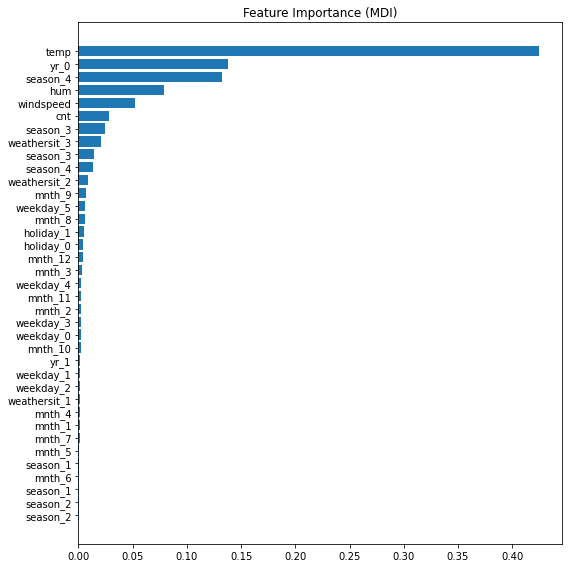

In [618]:
from sklearn.inspection import permutation_importance
#
# Now let's determine feature importances
#
feature_importance = gradient1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(scaled_df1.columns)[sorted_idx])
plt.title('Feature Importance')
result = permutation_importance(gradient1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

We can conclude that temperature, seasons (especially if it's winter or fall), windspeed 
and weather situation (especially if it's cloudy or rainy, humidity are important features.)

       
The average temperature in Philadelphia is 13.1 C meaning 0.483(AKA  - The lowest is -3.3 C and the highest is 30.6 C)
SOURCE: https://weatherspark.com/y/22721/Average-Weather-in-Philadelphia-Pennsylvania-United-States-Year-Round#:~:text=In%20Philadelphia%2C%20the%20summers%20are,or%20above%2094%C2%B0F.

The number of days with precipitation in Phily is 119 days.  Humidity in Philadelphia annually is 0.67
https://www.bestplaces.net/climate/city/pennsylvania/philadelphia

In [619]:
bike_data.iloc[0]

instant                1
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
holiday                0
weekday                6
workingday             0
weathersit             2
temp            0.344167
atemp           0.363625
hum             0.805833
windspeed       0.160446
casual               331
registered           654
cnt                  985
Name: 0, dtype: object

In [620]:
df1.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

Info on Philly's weather on January 1st 2023: temp - 47.31  F (0.46), weathersit - 2, winspeed 40 mph (0.6),humidity is 87.4
https://www.wunderground.com/history/daily/us/pa/philadelphia/KPHL/date/2023-1-1
Info on population: DC's population is 712.816 and Philadelphia's population is 1,576,000 (source: wikipedia)

In [621]:
# finding the potential count on January 1st in Philadelphia using the population ratio
y_pred_philly = gradient1.predict(Jan_1) * pop_ratio
y_pred_philly = pd.DataFrame (y_pred_philly)

y_pred_philly[0]

0   -0.798689
Name: 0, dtype: float64

In [622]:
#getting mean and standard deviation for undoing the standard scale
bike_std= bike_data['cnt'].std()
bike_mean = bike_data['cnt'].mean()


jan1_philly = ((y_pred_philly[0] * bike_std) + bike_mean)
print(jan1_philly)

0    2967.893975
Name: 0, dtype: float64


In [623]:
#creating a function to predict Philadelphia bike rental count
pop_ratio = 1576000/ 712816

def predict_philly (data):
        y_pred_philly = pd.DataFrame(gradient1.predict(data) * pop_ratio)
        # undoing the StandardScaler
        return round ((y_pred_philly * bike_std) + bike_mean)
    

In [624]:
#Creating a dataframe with January 1st 2023 Philadelphia weather info

data = [[0.48, 0.87, 0.6, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,0]]
 
# Create the pandas DataFrame (I mark the year 0 over year 1 since it will be the first year for Philadelphia as well.)
Jan_1 = pd.DataFrame(data, columns=['temp', 'hum', 'windspeed', 'season_1', 'season_2','season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'])
 
# print dataframe.
print(Jan_1)

   temp   hum  windspeed  season_1  season_2  season_3  season_4  \
0  0.48  0.87        0.6         1         0         0         0   

   weathersit_1  weathersit_2  weathersit_3  ...  mnth_12  holiday_0  \
0             0             1             0  ...        0          1   

   holiday_1  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \
0          0          1          0          0          0          0   

   weekday_5  weekday_6  
0          0          0  

[1 rows x 37 columns]


In [625]:

predict_philly(Jan_1)


,0
0,2968.0


Our prediction model predicts that on January 1st 2023 there would have been 2968 rentals.